In [1]:
import sys
import os
sys.path.append('/home/franzi/anzeigendaten/python_base/skillextraktion/fh_ma')
sys.path.append('/home/franzi/anzeigendaten/EnvPython')
import prepare_training_data
from labels import *
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle
import numpy as np
np.set_printoptions(precision=3)
%precision 3

start = time.time()
x_train, y_train, x_test, y_test, test_afks, features = prepare_training_data.get_training_data()
print('took: ',time.time()-start)

20861874
0
skipgram, punctuation_marks, stoppwords, multiword, lower_case, vector_dim False False False False False 100
init /home/franzi/Documents/models/no_pm_no_sw_vecDim100/cbow_model.model
loading existing w2v model from  /home/franzi/Documents/models/no_pm_no_sw_vecDim100/cbow_model.model
using data from  /home/franzi/Documents/data/data_4_vecDim100_cbow
loading data...
37163 37163 11805 11805 0 0
took:  3.877554416656494


In [ ]:
import numpy as np
label_y = prepare_training_data.one_hot_to_labels(y_train)

In [4]:
from tensorflow.keras import *

In [5]:
# Build the model
print('Build model...')
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
nsamples, nx, ny = x_train.shape
print(x_train.shape)
x_train2 = x_train.reshape((nsamples,nx*ny))
print(x_train2.shape)
y_train2 = prepare_training_data.one_hot_to_labels(y_train)
clf.fit(x_train2, y_train2)

Build model...
(37163, 9, 100)
(37163, 900)


GaussianNB(priors=None, var_smoothing=1e-09)

In [7]:

nsamples, nx, ny = x_test.shape
print(x_test.shape)
x_test2 = x_test.reshape((nsamples,nx*ny))
print(x_test2.shape)
# predict test data
y_pred = clf.predict(x_test2)

(11805, 9, 100)
(11805, 900)


In [ ]:
import numpy as np
# convert one hot to labels for test data
pred_label = y_pred
true_label = prepare_training_data.one_hot_to_labels(y_test)

In [9]:
# Calc metrics for test data
import sklearn
from sklearn.metrics import precision_score, recall_score
from tabulate import tabulate
label_list = list(labels.keys())

headers = [l for l in label_list ]
headers = [' '] + headers

table=[['precision'] + list(precision_score(true_label, pred_label, average=None)), 
       ['recall']+list(recall_score(true_label, pred_label, average=None)), 
       ['f1']+ list(sklearn.metrics.f1_score(true_label, pred_label, average=None))]

print(tabulate(table, headers=headers, tablefmt='orgtbl'))
f1 = sklearn.metrics.f1_score(true_label, pred_label, average=None)
f1 = np.delete(f1, 4)
f1 = np.delete(f1, 6)
print('f1 average: ',sum(sklearn.metrics.f1_score(true_label, pred_label, average=None))/len(list(precision_score(true_label, pred_label, average=None))))
print('f1 average: ',sum(f1)/6)
print('Precision average: ',sum(precision_score(true_label, pred_label, average=None)/8))
print('Recall average: ',sum(recall_score(true_label, pred_label, average=None)/8))
print('acc', sklearn.metrics.accuracy_score(true_label, pred_label))

|           |   Ausbildung |     Beruf |   allgemein |   berufsspez |   Sprache |   Technologie |   Softskill |   noSkill |
|-----------+--------------+-----------+-------------+--------------+-----------+---------------+-------------+-----------|
| precision |     0.302972 | 0.0322917 |    0.165368 |     0.32498  |  0.884058 |      0.459658 |    0.506928 |  0.895761 |
| recall    |     0.868519 | 0.5       |    0.388186 |     0.394112 |  0.831818 |      0.74702  |    0.822097 |  0.385749 |
| f1        |     0.449234 | 0.0606654 |    0.231933 |     0.356223 |  0.857143 |      0.569122 |    0.627143 |  0.539269 |
f1 average:  0.4613414176128397
f1 average:  0.3823866639363495
Precision average:  0.4465022013188178
Recall average:  0.6171875893116431
acc 0.4802202456586192


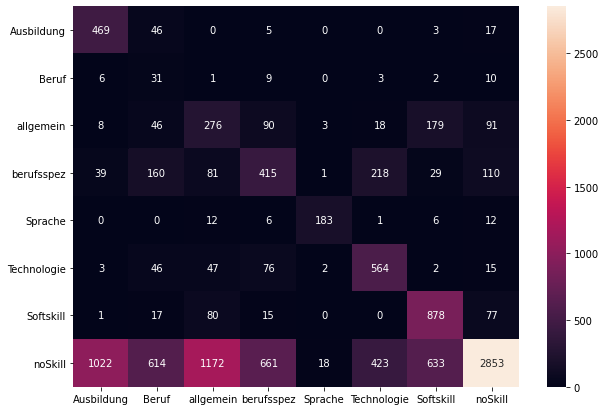

In [10]:
# Create Confusion Matrix

import sklearn
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = sklearn.metrics.confusion_matrix(true_label, pred_label)
df_cm = pd.DataFrame(cm, labels,columns = labels)
plt.figure(figsize = (10,7))
plt.ylabel('Eingabe')
plt.xlabel('Ausgabe')
sn.heatmap(df_cm, annot=True,fmt='g')

In [11]:
# clean noSkill for evaluation
clean_y_pred = []
clean_y_test = []
true_noSkills = 0
clean_x_test = []
afks = []

for i in range(len(y_test)):
    if(true_label[i] != 7 or pred_label[i] != 7):
        clean_x_test.append(x_test[i])
        clean_y_pred.append(pred_label[i])
        clean_y_test.append(true_label[i])
        afks.append(test_afks[i])
    else:
        true_noSkills += 1
pred_label = clean_y_pred
true_label = clean_y_test
print('correctly labeled noSkills: ', true_noSkills)

correctly labeled noSkills:  2853


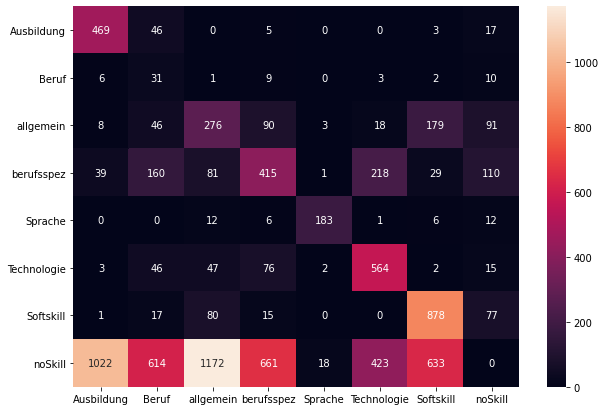

In [12]:
# Create Confusion Matrix

import sklearn
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = sklearn.metrics.confusion_matrix(true_label, pred_label)
df_cm = pd.DataFrame(cm, labels,columns = labels)
plt.figure(figsize = (10,7))
plt.ylabel('Eingabe')
plt.xlabel('Ausgabe')
sn.heatmap(df_cm, annot=True,fmt='g')